### 資料來源：[開放台灣民間租屋資料](https://rentalhouse.g0v.ddio.io/download)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# 地圖 package
import folium
# 不輸出警告
import warnings
warnings.filterwarnings("ignore")


# 讀入資料
houserent_Q1_df = pd.read_csv('/Users/john.tung/Downloads/rent_house/2019Q1-deduplicated.csv')
houserent_Q2_df = pd.read_csv('/Users/john.tung/Downloads/rent_house/2019Q2-deduplicated.csv')
houserent_Q3_df = pd.read_csv('/Users/john.tung/Downloads/rent_house/2019Q3-deduplicated.csv')

houserent_Q1_df['季'] = 'Q1'
houserent_Q2_df['季'] = 'Q2'
houserent_Q3_df['季'] = 'Q3'

print(houserent_Q1_df.info())
print(houserent_Q2_df.info())
print(houserent_Q3_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217511 entries, 0 to 217510
Data columns (total 87 columns):
重複物件數              217511 non-null int64
最大物件編號             217511 non-null int64
最小物件編號             217511 non-null int64
最大物件首次發現時間         217511 non-null object
最小物件首次發現時間         217511 non-null object
租屋平台               217511 non-null object
縣市                 217511 non-null int64
鄉鎮市區               217511 non-null int64
約略地點範圍             217511 non-null object
房屋曾出租過             217511 non-null int64
最後出租時間             217511 non-null object
最大出租所費天數           217511 non-null object
月租金                217511 non-null object
押金類型               217511 non-null int64
押金月數               217511 non-null object
押金金額               217511 non-null object
需要管理費？             217511 non-null object
月管理費               217511 non-null object
提供車位？              217511 non-null object
需要停車費？             217511 non-null object
月停車費               217511 non-null object
每坪租金（含管理費與停車費）

### 將三季資料合為一張表

In [2]:
houserent_df = pd.concat([houserent_Q1_df, houserent_Q2_df, houserent_Q3_df], axis=0)
print(houserent_df.shape)
houserent_df.head()

(705799, 87)


重複物件數   最大物件編號   最小物件編號               最大物件首次發現時間               最小物件首次發現時間  \
0      1  1018695  1018695  2018-12-10 04:44:50 CST  2018-12-10 04:44:50 CST   
1      1  1094676  1094676  2019-01-09 04:42:33 CST  2019-01-09 04:42:33 CST   
2      1  1095717  1095717  2019-03-19 04:27:55 CST  2019-03-19 04:27:55 CST   
3      1  1135496  1135496  2019-01-30 04:09:23 CST  2019-01-30 04:09:23 CST   
4      1  1175430  1175430  2018-12-10 04:12:14 CST  2018-12-10 04:12:14 CST   

      租屋平台  縣市  鄉鎮市區                                             約略地點範圍  \
0  591 租屋網  18  1806     (23.009119, 120.221691, 23.009119, 120.221691)   
1  591 租屋網  25  2528     (22.621758, 120.318962, 22.621758, 120.318962)   
2  591 租屋網  11  1111     (25.002299, 121.454963, 25.002299, 121.454963)   
3  591 租屋網  17  1708   (25.0360616, 121.560653, 25.0360616, 121.560653)   
4  591 租屋網  17  1706  (25.0966454, 121.5401611, 25.0966454, 121.5401...   

   房屋曾出租過  ... 提供家具_熱水器？.1 提供家具_冷氣？.1 提供家具_沙發？.1 提供家具_洗衣機？.1 提供家具_衣櫃？.1  \
0       1  ...           T          F          F           T          T   
1       1  ...           T          T          F           F          F   
2       1  ...           T          T          F           F          T   
3       1  ...           -          -          -           -          -   
4       1  ...           F          T          T           T          T   

  提供家具_冰箱？.1 提供家具_網路？.1 提供家具_第四台？.1 提供家具_天然瓦斯？.1   季  
0          T          T           F            F  Q1  
1          T          F           F            F  Q1  
2          F          F           F            T  Q1  
3          -          -           -            -  Q1  
4          T          T           T            T  Q1  

[5 rows x 87 columns]

### 篩出臺北市資料

In [3]:
taipei_houserent_df = houserent_df[houserent_df['縣市'] == 17]
print(taipei_houserent_df.shape)
taipei_houserent_df.head()

(137491, 87)


重複物件數   最大物件編號   最小物件編號               最大物件首次發現時間               最小物件首次發現時間  \
3       1  1135496  1135496  2019-01-30 04:09:23 CST  2019-01-30 04:09:23 CST   
4       1  1175430  1175430  2018-12-10 04:12:14 CST  2018-12-10 04:12:14 CST   
6       1  1202513  1202513  2019-02-27 04:05:55 CST  2019-02-27 04:05:55 CST   
9       1   128285   128285  2019-01-27 04:06:57 CST  2019-01-27 04:06:57 CST   
10      1  1329657  1329657  2019-01-22 04:05:49 CST  2019-01-22 04:05:49 CST   

       租屋平台  縣市  鄉鎮市區                                             約略地點範圍  \
3   591 租屋網  17  1708   (25.0360616, 121.560653, 25.0360616, 121.560653)   
4   591 租屋網  17  1706  (25.0966454, 121.5401611, 25.0966454, 121.5401...   
6   591 租屋網  17  1709  (24.9858373, 121.5671734, 24.9858373, 121.5671...   
9   591 租屋網  17  1709     (24.997309, 121.550884, 24.997309, 121.550884)   
10  591 租屋網  17  1709     (25.005247, 121.541557, 25.005247, 121.541557)   

    房屋曾出租過  ... 提供家具_熱水器？.1 提供家具_冷氣？.1 提供家具_沙發？.1 提供家具_洗衣機？.1 提供家具_衣櫃？.1  \
3        1  ...           -          -          -           -          -   
4        1  ...           F          T          T           T          T   
6        2  ...           T          T          F           F          T   
9        2  ...           T          T          F           T          T   
10       1  ...           T          T          F           T          T   

   提供家具_冰箱？.1 提供家具_網路？.1 提供家具_第四台？.1 提供家具_天然瓦斯？.1   季  
3           -          -           -            -  Q1  
4           T          T           T            T  Q1  
6           F          F           F            T  Q1  
9           T          T           F            T  Q1  
10          T          T           T            F  Q1  

[5 rows x 87 columns]

In [4]:
# 了解有哪些欄位
taipei_houserent_df.columns

Index(['重複物件數', '最大物件編號', '最小物件編號', '最大物件首次發現時間', '最小物件首次發現時間', '租屋平台', '縣市',
       '鄉鎮市區', '約略地點範圍', '房屋曾出租過', '最後出租時間', '最大出租所費天數', '月租金', '押金類型', '押金月數',
       '押金金額', '需要管理費？', '月管理費', '提供車位？', '需要停車費？', '月停車費', '每坪租金（含管理費與停車費）',
       '建築類型', '物件類型', '自報頂加？', '所在樓層', '建物樓高', '距頂樓層數', '坪數', '陽台數', '衛浴數',
       '房數', '客廳數', '格局編碼（陽台/衛浴/房/廳）', '額外費用_電費？', '額外費用_水費？', '額外費用_瓦斯？',
       '額外費用_網路？', '額外費用_第四台？', '附近有_學校？', '附近有_公園？', '附近有_百貨公司？', '附近有_超商？',
       '附近有_傳統市場？', '附近有_夜市？', '附近有_醫療機構？', '附近的捷運站數', '附近的公車站數', '附近的火車站數',
       '附近的高鐵站數', '附近的公共自行車數（實驗中）', '有身份限制？', '有性別限制？', '性別限制', '可炊？', '可寵？',
       '有產權登記？', '刊登者類型', '最大刊登者編碼', '仲介資訊', '提供家具_床？', '提供家具_桌子？', '提供家具_椅子？',
       '提供家具_電視？', '提供家具_熱水器？', '提供家具_冷氣？', '提供家具_沙發？', '提供家具_洗衣機？',
       '提供家具_衣櫃？', '提供家具_冰箱？', '提供家具_網路？', '提供家具_第四台？', '提供家具_天然瓦斯？',
       '提供家具_床？.1', '提供家具_桌子？.1', '提供家具_椅子？.1', '提供家具_電視？.1', '提供家具_熱水器？.1',
       '提供家具_冷氣？.1', '提供家具_沙發？.1', '提供家具_洗衣機？.1', '提供家具_衣櫃？.1', '提供家具_冰箱？.1',
     

### 將鄉鎮市區轉為文字

In [5]:
aria_df = pd.read_csv('/Users/john.tung/Downloads/rent_house/編碼表/編碼表.鄉鎮市區.csv')
aria_df = aria_df[aria_df['代表'].str.contains('臺北市')]
aria_df['代表'] = [aria.replace('臺北市', '') for aria in aria_df['代表']]
aria_df

編碼   代表        發行日期
204  1700  中山區  2018/05/31
205  1701  中正區  2018/05/31
206  1702  信義區  2018/05/31
207  1703  內湖區  2018/05/31
208  1704  北投區  2018/05/31
209  1705  南港區  2018/05/31
210  1706  士林區  2018/05/31
211  1707  大同區  2018/05/31
212  1708  大安區  2018/05/31
213  1709  文山區  2018/05/31
214  1710  松山區  2018/05/31
215  1711  萬華區  2018/05/31

### 轉換為適合 merge 的欄位名稱

In [6]:
taipei_houserent_df = taipei_houserent_df.rename(columns={'鄉鎮市區':'鄉鎮市區編碼'})
taipei_houserent_df.head()

重複物件數   最大物件編號   最小物件編號               最大物件首次發現時間               最小物件首次發現時間  \
3       1  1135496  1135496  2019-01-30 04:09:23 CST  2019-01-30 04:09:23 CST   
4       1  1175430  1175430  2018-12-10 04:12:14 CST  2018-12-10 04:12:14 CST   
6       1  1202513  1202513  2019-02-27 04:05:55 CST  2019-02-27 04:05:55 CST   
9       1   128285   128285  2019-01-27 04:06:57 CST  2019-01-27 04:06:57 CST   
10      1  1329657  1329657  2019-01-22 04:05:49 CST  2019-01-22 04:05:49 CST   

       租屋平台  縣市  鄉鎮市區編碼                                             約略地點範圍  \
3   591 租屋網  17    1708   (25.0360616, 121.560653, 25.0360616, 121.560653)   
4   591 租屋網  17    1706  (25.0966454, 121.5401611, 25.0966454, 121.5401...   
6   591 租屋網  17    1709  (24.9858373, 121.5671734, 24.9858373, 121.5671...   
9   591 租屋網  17    1709     (24.997309, 121.550884, 24.997309, 121.550884)   
10  591 租屋網  17    1709     (25.005247, 121.541557, 25.005247, 121.541557)   

    房屋曾出租過  ... 提供家具_熱水器？.1 提供家具_冷氣？.1 提供家具_沙發？.1 提供家具_洗衣機？.1 提供家具_衣櫃？.1  \
3        1  ...           -          -          -           -          -   
4        1  ...           F          T          T           T          T   
6        2  ...           T          T          F           F          T   
9        2  ...           T          T          F           T          T   
10       1  ...           T          T          F           T          T   

   提供家具_冰箱？.1 提供家具_網路？.1 提供家具_第四台？.1 提供家具_天然瓦斯？.1   季  
3           -          -           -            -  Q1  
4           T          T           T            T  Q1  
6           F          F           F            T  Q1  
9           T          T           F            T  Q1  
10          T          T           T            F  Q1  

[5 rows x 87 columns]

In [7]:
aria_df = aria_df.rename(columns={'編碼':'鄉鎮市區編碼', '代表':'鄉鎮市區'})
aria_df = aria_df.drop(columns= ['發行日期'])
aria_df

鄉鎮市區編碼 鄉鎮市區
204    1700  中山區
205    1701  中正區
206    1702  信義區
207    1703  內湖區
208    1704  北投區
209    1705  南港區
210    1706  士林區
211    1707  大同區
212    1708  大安區
213    1709  文山區
214    1710  松山區
215    1711  萬華區

In [8]:
taipei_houserent_df = taipei_houserent_df.merge(aria_df, on=['鄉鎮市區編碼'])
taipei_houserent_df.head()

重複物件數   最大物件編號   最小物件編號               最大物件首次發現時間               最小物件首次發現時間  \
0      1  1135496  1135496  2019-01-30 04:09:23 CST  2019-01-30 04:09:23 CST   
1      1  1478341  1478341  2019-03-19 04:06:41 CST  2019-03-19 04:06:41 CST   
2      1  2403154  2403154  2018-12-31 04:07:26 CST  2018-12-31 04:07:26 CST   
3      1  2495359  2495359  2019-03-08 04:09:05 CST  2019-03-08 04:09:05 CST   
4      1  2787218  2787218  2019-02-12 04:05:23 CST  2019-02-12 04:05:23 CST   

      租屋平台  縣市  鄉鎮市區編碼                                             約略地點範圍  \
0  591 租屋網  17    1708   (25.0360616, 121.560653, 25.0360616, 121.560653)   
1  591 租屋網  17    1708  (25.0218698, 121.5418841, 25.0218698, 121.5418...   
2  591 租屋網  17    1708     (25.023734, 121.541449, 25.023734, 121.541449)   
3  591 租屋網  17    1708   (25.0261631, 121.551178, 25.0261631, 121.551178)   
4  591 租屋網  17    1708  (25.0238814, 121.5522054, 25.0238814, 121.5522...   

   房屋曾出租過  ... 提供家具_冷氣？.1 提供家具_沙發？.1 提供家具_洗衣機？.1 提供家具_衣櫃？.1 提供家具_冰箱？.1  \
0       1  ...          -          -           -          -          -   
1       0  ...          T          F           T          T          T   
2       2  ...          T          T           F          T          T   
3       0  ...          T          F           F          T          F   
4       2  ...          T          F           T          T          F   

  提供家具_網路？.1 提供家具_第四台？.1 提供家具_天然瓦斯？.1   季 鄉鎮市區  
0          -           -            -  Q1  大安區  
1          T           T            T  Q1  大安區  
2          F           F            F  Q1  大安區  
3          F           F            T  Q1  大安區  
4          T           T            F  Q1  大安區  

[5 rows x 88 columns]

### 去除沒用的欄位

In [9]:
taipei_houserent_df = taipei_houserent_df.drop(columns= ['縣市', '鄉鎮市區編碼', '租屋平台'])
taipei_houserent_df.head()

重複物件數   最大物件編號   最小物件編號               最大物件首次發現時間               最小物件首次發現時間  \
0      1  1135496  1135496  2019-01-30 04:09:23 CST  2019-01-30 04:09:23 CST   
1      1  1478341  1478341  2019-03-19 04:06:41 CST  2019-03-19 04:06:41 CST   
2      1  2403154  2403154  2018-12-31 04:07:26 CST  2018-12-31 04:07:26 CST   
3      1  2495359  2495359  2019-03-08 04:09:05 CST  2019-03-08 04:09:05 CST   
4      1  2787218  2787218  2019-02-12 04:05:23 CST  2019-02-12 04:05:23 CST   

                                              約略地點範圍  房屋曾出租過  \
0   (25.0360616, 121.560653, 25.0360616, 121.560653)       1   
1  (25.0218698, 121.5418841, 25.0218698, 121.5418...       0   
2     (25.023734, 121.541449, 25.023734, 121.541449)       2   
3   (25.0261631, 121.551178, 25.0261631, 121.551178)       0   
4  (25.0238814, 121.5522054, 25.0238814, 121.5522...       2   

                    最後出租時間 最大出租所費天數    月租金  ... 提供家具_冷氣？.1 提供家具_沙發？.1  \
0                        -        -  14000  ...          -          -   
1                        -        -  11000  ...          T          F   
2  2019-01-14 07:05:23 CST       15  27000  ...          T          T   
3                        -        -  22000  ...          T          F   
4  2019-02-14 06:24:51 CST        3  15500  ...          T          F   

  提供家具_洗衣機？.1 提供家具_衣櫃？.1 提供家具_冰箱？.1 提供家具_網路？.1 提供家具_第四台？.1 提供家具_天然瓦斯？.1   季  \
0           -          -          -          -           -            -  Q1   
1           T          T          T          T           T            T  Q1   
2           F          T          T          F           F            F  Q1   
3           F          T          F          F           F            T  Q1   
4           T          T          F          T           T            F  Q1   

   鄉鎮市區  
0   大安區  
1   大安區  
2   大安區  
3   大安區  
4   大安區  

[5 rows x 85 columns]

In [10]:
# 再次確認欄位
taipei_houserent_df.columns

Index(['重複物件數', '最大物件編號', '最小物件編號', '最大物件首次發現時間', '最小物件首次發現時間', '約略地點範圍',
       '房屋曾出租過', '最後出租時間', '最大出租所費天數', '月租金', '押金類型', '押金月數', '押金金額', '需要管理費？',
       '月管理費', '提供車位？', '需要停車費？', '月停車費', '每坪租金（含管理費與停車費）', '建築類型', '物件類型',
       '自報頂加？', '所在樓層', '建物樓高', '距頂樓層數', '坪數', '陽台數', '衛浴數', '房數', '客廳數',
       '格局編碼（陽台/衛浴/房/廳）', '額外費用_電費？', '額外費用_水費？', '額外費用_瓦斯？', '額外費用_網路？',
       '額外費用_第四台？', '附近有_學校？', '附近有_公園？', '附近有_百貨公司？', '附近有_超商？', '附近有_傳統市場？',
       '附近有_夜市？', '附近有_醫療機構？', '附近的捷運站數', '附近的公車站數', '附近的火車站數', '附近的高鐵站數',
       '附近的公共自行車數（實驗中）', '有身份限制？', '有性別限制？', '性別限制', '可炊？', '可寵？', '有產權登記？',
       '刊登者類型', '最大刊登者編碼', '仲介資訊', '提供家具_床？', '提供家具_桌子？', '提供家具_椅子？',
       '提供家具_電視？', '提供家具_熱水器？', '提供家具_冷氣？', '提供家具_沙發？', '提供家具_洗衣機？',
       '提供家具_衣櫃？', '提供家具_冰箱？', '提供家具_網路？', '提供家具_第四台？', '提供家具_天然瓦斯？',
       '提供家具_床？.1', '提供家具_桌子？.1', '提供家具_椅子？.1', '提供家具_電視？.1', '提供家具_熱水器？.1',
       '提供家具_冷氣？.1', '提供家具_沙發？.1', '提供家具_洗衣機？.1', '提供家具_衣櫃？.1', '提供家具_冰箱？.1',
       '提供家具_網路？.1', '提供家具_

In [11]:
aria_rent_count = pd.DataFrame({'租屋數':taipei_houserent_df.groupby('鄉鎮市區').size()}).reset_index().sort_values('租屋數', ascending= False)
aria_rent_count

鄉鎮市區    租屋數
0   中山區  28354
8   大安區  18106
2   信義區  15441
3   內湖區  12949
6   士林區  12175
1   中正區   8795
10  松山區   8498
4   北投區   7960
9   文山區   6921
11  萬華區   6549
7   大同區   6471
5   南港區   5272

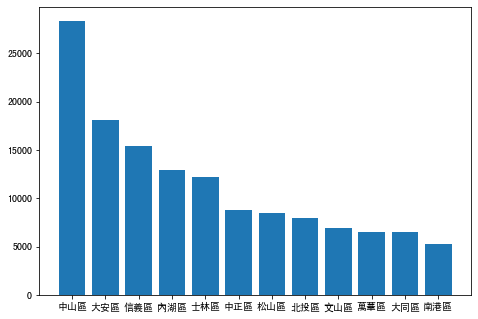

In [12]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(list(aria_rent_count['鄉鎮市區']),list(aria_rent_count['租屋數']))
plt.show()

### 看看物件類型

In [13]:
object_df = pd.read_csv('/Users/john.tung/Downloads/rent_house/編碼表/編碼表.物件類型.csv')
object_df = object_df.rename(columns={'編碼':'物件類型', '代表':'房型'}).drop(columns= ['發行日期'])
object_df

物件類型    房型
0      0  整層住家
1      1  獨立套房
2      2  分租套房
3      3    雅房
4      4    車位
5      5    其他
6      6    倉庫
7      7    場地
8  65535    不明

In [14]:
taipei_houserent_df = taipei_houserent_df.merge(object_df, on=['物件類型'])
taipei_houserent_df = taipei_houserent_df.drop(columns=['物件類型'])
taipei_houserent_df.head()

重複物件數   最大物件編號   最小物件編號               最大物件首次發現時間               最小物件首次發現時間  \
0      1  1135496  1135496  2019-01-30 04:09:23 CST  2019-01-30 04:09:23 CST   
1      1  2403154  2403154  2018-12-31 04:07:26 CST  2018-12-31 04:07:26 CST   
2      1  2495359  2495359  2019-03-08 04:09:05 CST  2019-03-08 04:09:05 CST   
3      1  2903154  2903154  2019-02-28 04:03:59 CST  2019-02-28 04:03:59 CST   
4      1  3137262  3137262  2019-03-10 04:07:05 CST  2019-03-10 04:07:05 CST   

                                              約略地點範圍  房屋曾出租過  \
0   (25.0360616, 121.560653, 25.0360616, 121.560653)       1   
1     (25.023734, 121.541449, 25.023734, 121.541449)       2   
2   (25.0261631, 121.551178, 25.0261631, 121.551178)       0   
3  (25.0294041, 121.5391259, 25.0294041, 121.5391...       1   
4  (25.0351052, 121.5424466, 25.0351052, 121.5424...       2   

                    最後出租時間 最大出租所費天數    月租金  ... 提供家具_沙發？.1 提供家具_洗衣機？.1  \
0                        -        -  14000  ...          -           -   
1  2019-01-14 07:05:23 CST       15  27000  ...          T           F   
2                        -        -  22000  ...          F           F   
3                        -        -  30000  ...          F           F   
4  2019-03-18 06:18:13 CST        7  20000  ...          T           T   

  提供家具_衣櫃？.1 提供家具_冰箱？.1 提供家具_網路？.1 提供家具_第四台？.1 提供家具_天然瓦斯？.1   季  鄉鎮市區    房型  
0          -          -          -           -            -  Q1   大安區  整層住家  
1          T          T          F           F            F  Q1   大安區  整層住家  
2          T          F          F           F            T  Q1   大安區  整層住家  
3          F          F          F           F            T  Q1   大安區  整層住家  
4          T          F          F           F            T  Q1   大安區  整層住家  

[5 rows x 85 columns]

In [15]:
pd.DataFrame({'count':taipei_houserent_df.groupby('房型').size()}).reset_index()

房型  count
0  分租套房  15683
1  整層住家  72217
2  獨立套房  40358
3    雅房   9233

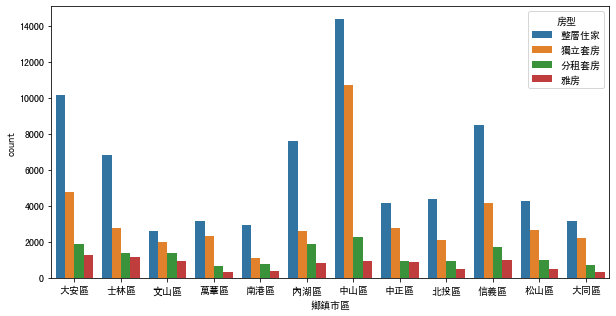

In [16]:
plt.figure(figsize=(10, 5))
sns.countplot(taipei_houserent_df['鄉鎮市區'], hue=taipei_houserent_df['房型'])

### 以季拆開來看

In [17]:
taipei_houserent_df_Q1 = taipei_houserent_df[taipei_houserent_df['季'] == 'Q1']
taipei_houserent_df_Q2 = taipei_houserent_df[taipei_houserent_df['季'] == 'Q2']
taipei_houserent_df_Q3 = taipei_houserent_df[taipei_houserent_df['季'] == 'Q3']

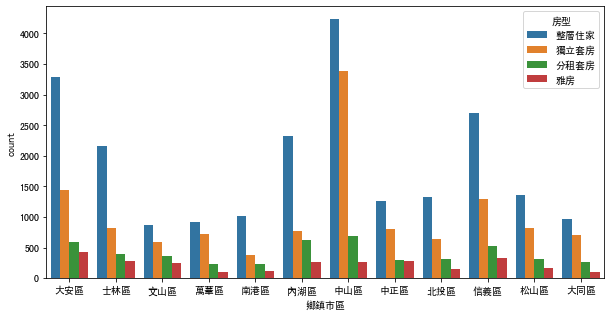

In [18]:
plt.figure(figsize=(10, 5))
sns.countplot(taipei_houserent_df_Q1['鄉鎮市區'], hue=taipei_houserent_df_Q1['房型'])

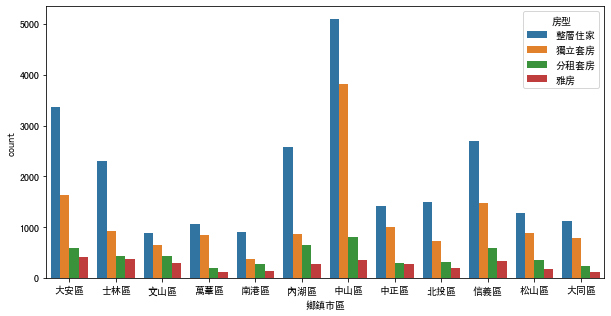

In [19]:
plt.figure(figsize=(10, 5))
sns.countplot(taipei_houserent_df_Q2['鄉鎮市區'], hue=taipei_houserent_df_Q2['房型'])

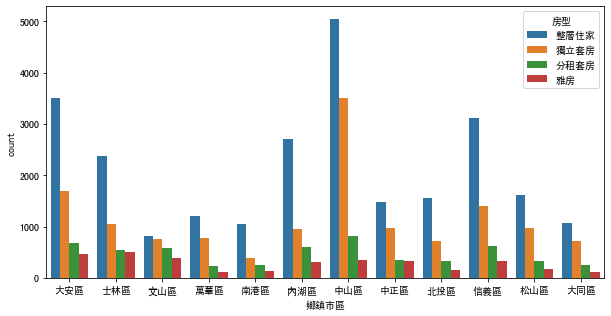

In [20]:
plt.figure(figsize=(10, 5))
sns.countplot(taipei_houserent_df_Q3['鄉鎮市區'], hue=taipei_houserent_df_Q3['房型'])

In [74]:
season_df = pd.DataFrame({'Q1':taipei_houserent_df_Q1.groupby('房型').size(), 'Q2':taipei_houserent_df_Q2.groupby('房型').size(), 'Q3':taipei_houserent_df_Q3.groupby('房型').size()}).reset_index()
season_df

房型     Q1     Q2     Q3
0  分租套房   4817   5210   5656
1  整層住家  22426  24231  25560
2  獨立套房  12396  14012  13950
3    雅房   2735   3078   3420

In [75]:
season_df = season_df.T
season_df

0      1      2     3
房型  分租套房   整層住家   獨立套房    雅房
Q1  4817  22426  12396  2735
Q2  5210  24231  14012  3078
Q3  5656  25560  13950  3420

In [76]:
season_df.columns = season_df.iloc[0]
season_df = season_df.drop(['房型'])
season_df

房型  分租套房   整層住家   獨立套房    雅房
Q1  4817  22426  12396  2735
Q2  5210  24231  14012  3078
Q3  5656  25560  13950  3420

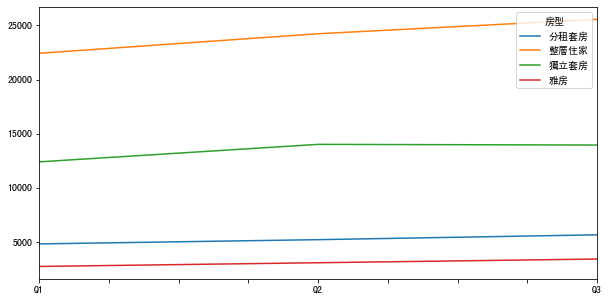

In [84]:
season_df.plot(figsize=(10, 5))

### 看看建築類型

In [86]:
taipei_houserent_df.groupby('建築類型').size()

建築類型
0    49722
1     5979
2    81790
dtype: int64

### 繪出臺北市租房座標圖

In [16]:
# 發現有些資料中不含經緯度資料，另建表格去除這些資料
taipei_have_place_df = taipei_houserent_df[taipei_houserent_df['約略地點範圍'] != '-']
taipei_have_place_df = taipei_have_place_df.drop(['重複物件數', '最大物件編號', '最小物件編號', '最大物件首次發現時間', '最小物件首次發現時間', '最後出租時間', '最大出租所費天數'], axis=1)
taipei_have_place_df.head()

約略地點範圍  房屋曾出租過    月租金 押金類型 押金月數  \
0   (25.0360616, 121.560653, 25.0360616, 121.560653)       1  14000    0  2.0   
1  (25.0218698, 121.5418841, 25.0218698, 121.5418...       0  11000    0  2.0   
2     (25.023734, 121.541449, 25.023734, 121.541449)       2  27000    0  2.0   
3   (25.0261631, 121.551178, 25.0261631, 121.551178)       0  22000    2    -   
4  (25.0238814, 121.5522054, 25.0238814, 121.5522...       2  15500    0  2.0   

    押金金額 需要管理費？ 月管理費 提供車位？ 需要停車費？  ... 提供家具_熱水器？.1  提供家具_冷氣？.1  提供家具_沙發？.1  \
0  28000      T  500     F      -  ...           -           -           -   
1  22000      F    0     F      -  ...           F           T           F   
2  54000      F    0     F      -  ...           T           T           T   
3      -      F    0     F      -  ...           T           T           F   
4  31000      F    0     F      -  ...           T           T           F   

   提供家具_洗衣機？.1 提供家具_衣櫃？.1  提供家具_冰箱？.1  提供家具_網路？.1 提供家具_第四台？.1  提供家具_天然瓦斯？.1  \
0            -          -           -           -           -             -   
1            T          T           T           T           T             T   
2            F          T           T           F           F             F   
3            F          T           F           F           F             T   
4            T          T           F           T           T             F   

  鄉鎮市區  
0  大安區  
1  大安區  
2  大安區  
3  大安區  
4  大安區  

[5 rows x 77 columns]

In [17]:
taipei_have_place_df['緯度'] = [float(latitude.split(',')[2]) for latitude in taipei_have_place_df['約略地點範圍']]
taipei_have_place_df['經度'] = [float(longitude.split(',')[1]) for longitude in taipei_have_place_df['約略地點範圍']]
print(taipei_have_place_df.shape)
taipei_have_place_df.head()

(136864, 79)


約略地點範圍  房屋曾出租過    月租金 押金類型 押金月數  \
0   (25.0360616, 121.560653, 25.0360616, 121.560653)       1  14000    0  2.0   
1  (25.0218698, 121.5418841, 25.0218698, 121.5418...       0  11000    0  2.0   
2     (25.023734, 121.541449, 25.023734, 121.541449)       2  27000    0  2.0   
3   (25.0261631, 121.551178, 25.0261631, 121.551178)       0  22000    2    -   
4  (25.0238814, 121.5522054, 25.0238814, 121.5522...       2  15500    0  2.0   

    押金金額 需要管理費？ 月管理費 提供車位？ 需要停車費？  ... 提供家具_沙發？.1  提供家具_洗衣機？.1  提供家具_衣櫃？.1  \
0  28000      T  500     F      -  ...          -            -           -   
1  22000      F    0     F      -  ...          F            T           T   
2  54000      F    0     F      -  ...          T            F           T   
3      -      F    0     F      -  ...          F            F           T   
4  31000      F    0     F      -  ...          F            T           T   

   提供家具_冰箱？.1 提供家具_網路？.1  提供家具_第四台？.1  提供家具_天然瓦斯？.1 鄉鎮市區         緯度  \
0           -          -            -             -  大安區  25.036062   
1           T          T            T             T  大安區  25.021870   
2           T          F            F             F  大安區  25.023734   
3           F          F            F             T  大安區  25.026163   
4           F          T            T             F  大安區  25.023881   

           經度  
0  121.560653  
1  121.541884  
2  121.541449  
3  121.551178  
4  121.552205  

[5 rows x 79 columns]

In [41]:
taipei_have_place_df[(taipei_have_place_df['房屋曾出租過'] == 0) & (taipei_have_place_df['月租金'].astype(int) > 100000)]

約略地點範圍  房屋曾出租過     月租金  \
1789    (25.0274816, 121.5469646, 25.0274816, 121.5469...       0  138000   
2585       (25.033747, 121.535734, 25.033747, 121.535734)       0  130000   
3791       (25.044395, 121.538501, 25.044395, 121.538501)       0  190000   
3864    (25.0392383, 121.5507355, 25.0392383, 121.5507...       0  120000   
3895    (25.0309843, 121.5581943, 25.0309843, 121.5581...       0  135000   
...                                                   ...     ...     ...   
130958     (25.057469, 121.548259, 25.057469, 121.548259)       0  150000   
130962     (25.056701, 121.547491, 25.056701, 121.547491)       0  150000   
130966     (25.04487, 121.5569305, 25.04487, 121.5569305)       0  160000   
136878     (25.053927, 121.513958, 25.053927, 121.513958)       0  450000   
137030  (25.0590113, 121.5181138, 25.0590113, 121.5181...       0  110000   

       押金類型 押金月數    押金金額 需要管理費？   月管理費 提供車位？ 需要停車費？  ... 提供家具_沙發？.1  \
1789      2    -       -      T  20000     T      T  ...          F   
2585      0  2.0  260000      T   8000     T      F  ...          F   
3791      2    -       -      F      0     T      F  ...          F   
3864      0  2.0  240000      F      0     T      T  ...          F   
3895      0  2.0  270000      T   5893     T      T  ...          -   
...     ...  ...     ...    ...    ...   ...    ...  ...        ...   
130958    0  2.0  300000      T   6418     T      F  ...          T   
130962    0  2.0  300000      T   6418     T      F  ...          T   
130966    2    -       -      T  11718     T      F  ...          T   
136878    1  0.5  225000      F      0     F      -  ...          F   
137030    0  2.0  220000      F      0     F      -  ...          T   

        提供家具_洗衣機？.1  提供家具_衣櫃？.1  提供家具_冰箱？.1 提供家具_網路？.1  提供家具_第四台？.1  \
1789              T           T           T          F            T   
2585              F           F           F          F            F   
3791              T           T           T          F            F   
3864              F           T           F          F            F   
3895              -           -           -          -            -   
...             ...         ...         ...        ...          ...   
130958            T           T           T          F            F   
130962            T           T           T          F            F   
130966            T           T           T          F            F   
136878            T           F           T          T            F   
137030            T           T           T          F            F   

        提供家具_天然瓦斯？.1 鄉鎮市區         緯度          經度  
1789               T  大安區  25.027482  121.546965  
2585               F  大安區  25.033747  121.535734  
3791               T  大安區  25.044395  121.538501  
3864               T  大安區  25.039238  121.550736  
3895               -  大安區  25.030984  121.558194  
...              ...  ...        ...         ...  
130958             T  松山區  25.057469  121.548259  
130962             T  松山區  25.056701  121.547491  
130966             T  松山區  25.044870  121.556931  
136878             T  大同區  25.053927  121.513958  
137030             T  大同區  25.059011  121.518114  

[729 rows x 79 columns]

In [55]:
pd.DataFrame({'count':taipei_have_place_df[taipei_have_place_df['月租金'].astype(int) > 100000].groupby('鄉鎮市區').size()}).reset_index().sort_values('count', ascending=False)

鄉鎮市區  count
6   士林區    942
8   大安區    862
2   信義區    859
0   中山區    716
3   內湖區    698
1   中正區    351
10  松山區    249
4   北投區    204
5   南港區    169
7   大同區      8
9   文山區      5
11  萬華區      5

In [57]:
# 繪出月租大於 100,000 的物件分佈
m = folium.Map(location=[25.0360616, 121.560653], zoom_start=12)

for Latitude_and_longitude in zip(taipei_have_place_df[taipei_have_place_df['月租金'].astype(int) > 100000]['緯度'],taipei_have_place_df[taipei_have_place_df['月租金'].astype(int) > 100000]['經度']):
    folium.Circle(
        radius=50,
        location=Latitude_and_longitude,
        popup='The Waterfront',
        color='crimson',
        fill=False,
    ).add_to(m)

m

### 有缺失值需做處理

In [9]:
taipei_houserent_df = taipei_houserent_df.fillna(0)
taipei_houserent_df.head()

additional_fee_cable_tv  additional_fee_eletricity  additional_fee_gas  \
0                     True                       True                True   
1                    False                      False               False   
2                     True                       True                True   
3                     True                       True               False   
4                    False                       True                True   

   additional_fee_internet  additional_fee_water agent_org  allow_pet  \
0                     True                  True         0      False   
1                    False                 False         0       True   
2                     True                  True         0      False   
3                    False                 False         0      False   
4                    False                 False         0      False   

  apt_feature_code  building_type  can_cook  ...  \
0        _01010201              0      True  ...   
1                0              1      True  ...   
2        _01010302              2      True  ...   
3                0              0     False  ...   
4                0              0      True  ...   

                                 rough_coordinate_bb  sub_region  top_region  \
0   [25.0360616, 121.560653, 25.0360616, 121.560653]        1708          17   
1  [25.0966454, 121.5401611, 25.0966454, 121.5401...        1706          17   
2  [24.9858373, 121.5671734, 24.9858373, 121.5671...        1709          17   
3     [24.997309, 121.550884, 24.997309, 121.550884]        1709          17   
4     [25.005247, 121.541557, 25.005247, 121.541557]        1709          17   

   total_floor  transportation_bus  transportation_hsr  \
0            6                 0.0                 0.0   
1            1                 2.0                 0.0   
2            8                 3.0                 0.0   
3            5                 2.0                 0.0   
4            4                 2.0                 0.0   

   transportation_public_bike  transportation_subway  transportation_train  \
0                         0.0                    0.0                   0.0   
1                         0.0                    1.0                   0.0   
2                         0.0                    0.0                   0.0   
3                         0.0                    1.0                   0.0   
4                         0.0                    1.0                   1.0   

    vendor  
0  591 租屋網  
1  591 租屋網  
2  591 租屋網  
3  591 租屋網  
4  591 租屋網  

[5 rows x 73 columns]

### 看資料分布，50% 和 max 差距不應該相差非常巨大，可以判斷有 Outlier，使用最簡單的超出三倍標準差概念將這些Outlier先去掉，避免對Model造成影響

In [4]:
taipei_houserent_df.describe()

allow_pet  building_type      can_cook       contact   deal_status  \
count  65773.000000   65773.000000  65773.000000  65773.000000  65773.000000   
mean       0.240904       1.330500      0.763033      1.388123      1.004181   
std        0.427636       0.931449      0.425225      0.886028      0.583139   
min        0.000000       0.000000      0.000000      0.000000      0.000000   
25%        0.000000       0.000000      1.000000      0.000000      1.000000   
50%        0.000000       2.000000      1.000000      2.000000      1.000000   
75%        0.000000       2.000000      1.000000      2.000000      1.000000   
max        1.000000       6.000000      1.000000      2.000000      2.000000   

            deposit  deposit_type  dist_to_highest_floor  facilities_冰箱  \
count  6.577300e+04  65773.000000           65773.000000   65773.000000   
mean   6.760526e+04      0.208338               3.817478       0.768993   
std    7.849304e+04      0.610154               3.996577       0.421480   
min    0.000000e+00      0.000000              -1.000000       0.000000   
25%    2.000000e+04      0.000000               1.000000       1.000000   
50%    4.999800e+04      0.000000               3.000000       1.000000   
75%    9.000000e+04      0.000000               6.000000       1.000000   
max    5.200000e+06      3.000000              70.000000       1.000000   

       facilities_冷氣  ...  rough_coordinate_x  rough_coordinate_y  \
count   65773.000000  ...        65773.000000        65773.000000   
mean        0.912289  ...           24.764574          120.130650   
std         0.282876  ...            2.684857           13.031839   
min         0.000000  ...            0.000000            0.000000   
25%         1.000000  ...           25.034954          121.523791   
50%         1.000000  ...           25.050936          121.538301   
75%         1.000000  ...           25.067330          121.563274   
max         1.000000  ...           25.856747          123.985746   

         sub_region  top_region   total_floor  transportation_bus  \
count  65773.000000     65773.0  65773.000000        65773.000000   
mean    1704.371840        17.0      9.114105            0.609490   
std        3.591082         0.0      5.392614            1.101482   
min     1700.000000        17.0      0.000000            0.000000   
25%     1701.000000        17.0      5.000000            0.000000   
50%     1704.000000        17.0      8.000000            0.000000   
75%     1708.000000        17.0     13.000000            1.000000   
max     1711.000000        17.0     77.000000            8.000000   

       transportation_hsr  transportation_public_bike  transportation_subway  \
count             65773.0                65773.000000           65773.000000   
mean                  0.0                    0.014535               0.789747   
std                   0.0                    0.129681               0.687344   
min                   0.0                    0.000000               0.000000   
25%                   0.0                    0.000000               0.000000   
50%                   0.0                    0.000000               1.000000   
75%                   0.0                    0.000000               1.000000   
max                   0.0                    6.000000               4.000000   

       transportation_train  
count          65773.000000  
mean               0.106214  
std                0.323613  
min                0.000000  
25%                0.000000  
50%                0.000000  
75%                0.000000  
max                4.000000  

[8 rows x 56 columns]

In [5]:
# 找出最大值和 50% 相差過大的欄位
for column_name in taipei_houserent_df.describe().columns:
    if taipei_houserent_df.describe()[column_name]['max'] - taipei_houserent_df.describe()[column_name]['50%'] > 10:
        print(column_name)

deposit
dist_to_highest_floor
floor
floor_ping
monthly_management_fee
monthly_price
n_day_deal
per_ping_price
total_floor
